# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
# import random so we can create to random tests.
import random

# show the directory of what we can do with 'random' 
dir(random)  # reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [2]:
# we want to create a data set so we are going to create a tuple.
from collections import namedtuple

# create the columns and label the tuple.
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

# create some data for an example user.
example_user = User(False, 12, False)

# show the example user data.
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# import numpy to generate #s.
import numpy as np

# random.normal() will generate a random number.
np.random.normal(10,2)

11.549397641393824

In [5]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

# label the data we are generating.
users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
# always good to shuffle the data that is random.  
  random.shuffle(users)
  
# show 10 users.  
users[:10]

[User(purchased=False, time_on_site=482.2157780797181, mobile=True),
 User(purchased=True, time_on_site=857.8716602426496, mobile=False),
 User(purchased=True, time_on_site=367.0331786362776, mobile=True),
 User(purchased=True, time_on_site=551.2274967504958, mobile=True),
 User(purchased=True, time_on_site=579.697555666254, mobile=True),
 User(purchased=True, time_on_site=677.6500341095436, mobile=True),
 User(purchased=True, time_on_site=338.4103146661647, mobile=True),
 User(purchased=False, time_on_site=544.1224306012757, mobile=True),
 User(purchased=False, time_on_site=307.0434336894467, mobile=True),
 User(purchased=True, time_on_site=336.6602886120519, mobile=True)]

In [6]:
# we can put this in a dataframe so we can look at it more easily.

# import pandas library.
import pandas as pd

# label the data set and load the 'user' data we generated.
user_data = pd.DataFrame(users)

# show the data set headers.
user_data.head()

,purchased,time_on_site,mobile
0,False,482.215778,True
1,True,857.871660,False
2,True,367.033179,True
3,True,551.227497,True
4,True,579.697556,True


In [7]:
# add a new column for converting seconds to minutes (for comparison reasons).
user_data['time_on_site_min'] = user_data['time_on_site'] / 60

# show the new data set with the new column.
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,482.215778,True,8.036930
1,True,857.871660,False,14.297861
2,True,367.033179,True,6.117220
3,True,551.227497,True,9.187125
4,True,579.697556,True,9.661626


In [8]:
# we can look for any negative data in the data set.
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min


In [9]:
# we are converting all negative data for 'time_on_site' to 0's.
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0

# comfirm there are no negatives in 'time_on_site'.
user_data[user_data.time_on_site < 0.0] # confirm no -#'s'

,purchased,time_on_site,mobile,time_on_site_min


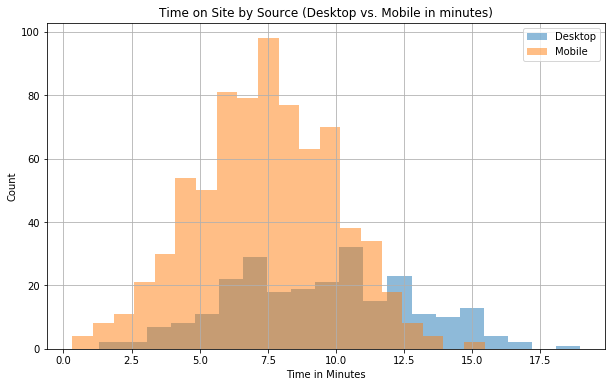

In [10]:
# import mat plotlib.pyplot as plt.
import matplotlib.pyplot as plt

# create a groupby graph with the 'mobile' and 'time_on_site' columns, (set 'bins', transparency 'alpha', figsize).
user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));

# give the graph a title.
plt.title('Time on Site by Source (Desktop vs. Mobile in minutes)');

# label the y axis.
plt.ylabel('Count')

# label the x axis.
plt.xlabel('Time in Minutes')

# create a legend for the data.
plt.legend(['Desktop','Mobile']);

In [11]:
# use crosstabulation to try to see what's going on with certain columns.
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,19.754605807165035,35.55057247543397,50.86632535944011,54.266383617869394,67.3388067019954,69.77719507661953,78.61154624629188,83.32053015638627,86.11556445383462,90.60940705861088,91.96533655470074,92.30548628307781,92.44509167713511,96.78018674792992,111.28891870436382,119.43489515128834,120.09189448763573,122.5770570318362,124.10494548616822,125.55914979729499,132.3894493831665,137.29084329056712,138.7390540073477,144.38086636517784,147.980417014191,154.49872171665663,160.64462896098047,168.81597819779563,169.30140353989566,169.38803933552094,170.36600137305925,172.6176621024524,172.7006892284221,174.9771413527833,175.22288429661785,178.87353267717356,179.0897791697031,179.9376834749014,184.14789414643673,184.57596976369143,...,788.7430221582017,792.7895457351863,795.7809822544052,796.8290595477072,800.8386457805157,811.5477023709313,818.8633626747908,824.2300526234308,826.1495243444562,832.0025478868091,840.0084221892038,842.1707105267978,843.2010231114782,843.5350900719411,848.7487688038905,857.8716602426496,860.2217617669146,866.526760732417,874.423873834709,878.0202047777257,879.0105639145027,885.3081427312047,886.1888810948063,889.2554110986562,891.3330011648402,902.127986548879,902.7422873679973,909.4462285855332,910.3222188054881,922.178395329293,924.606822209837,925.3657964175391,926.633793924869,927.1246228916771,927.2112849915021,927.5098460699296,947.5806869134424,1021.9369042913636,1022.6749065637114,1136.9325845275757
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
True,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1


In [12]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

# create 5 bins from the 'time_on_site' column.
time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins

# now we can crosstab and compare the 2 columns.
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.311, 4.053]",0.110588,0.062609
"(4.053, 7.777]",0.444706,0.393043
"(7.777, 11.501]",0.367059,0.412174
"(11.501, 15.225]",0.072941,0.116522
"(15.225, 18.949]",0.004706,0.015652


In [13]:
# crosstab and compare the column with the bins.
pd.crosstab(columns=user_data['purchased'], index=time_bins, normalize='index')

purchased,False,True
time_on_site_min,,
"(0.311, 4.053]",0.566265,0.433735
"(4.053, 7.777]",0.455422,0.544578
"(7.777, 11.501]",0.396947,0.603053
"(11.501, 15.225]",0.316327,0.683673
"(15.225, 18.949]",0.181818,0.818182


In [14]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.311, 4.053]",0.110588,0.062609
"(4.053, 7.777]",0.444706,0.393043
"(7.777, 11.501]",0.367059,0.412174
"(11.501, 15.225]",0.072941,0.116522
"(15.225, 18.949]",0.004706,0.015652


In [15]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.552,0.382667
True,0.448,0.617333


In [16]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(0.311, 4.053]    0.079710  0.125436  0.000000  0.077754
(4.053, 7.777]    0.311594  0.508711  0.267857  0.423326
(7.777, 11.501]   0.434783  0.334495  0.330357  0.431965
(11.501, 15.225]  0.159420  0.031359  0.339286  0.062635
(15.225, 18.949]  0.014493  0.000000  0.062500  0.004320

In [17]:
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.311, 4.053]",0.110588,0.062609
"(4.053, 7.777]",0.444706,0.393043
"(7.777, 11.501]",0.367059,0.412174
"(11.501, 15.225]",0.072941,0.116522
"(15.225, 18.949]",0.004706,0.015652


## Stanford Open Police Project
https://openpolicing.stanford.edu/findings/

In [61]:
%%time
df = pd.read_csv('https://stacks.stanford.edu/file/druid:jb084sr9005/jb084sr9005_nj_statewide_2019_02_25.csv.zip')
df = df.sample(100000)
print(df.shape)

ParserError: ignored

In [19]:
df.head()

,raw_row_number,date,time,location,subject_race,subject_sex,officer_id_hash,department_id,type,violation,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state
0,24723,2009-01-10,15:38:41,"31ST / CARMEN, Camden City",black,male,347f40fd4d,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,SIL,Chrysler,Town & Country,NJ
1,88239,2009-02-06,11:34:36,"@division, Ewing Twp",black,female,e84e551aad,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101999,2009-02-11,01:34:26,"34TH / WESTFIELD, Camden City",black,male,e008ccd5a2,A010,vehicular,NaN,True,NaN,NaN,arrest,False,True,GRY,Chevrolet,NaN,PA
3,151289,2009-03-03,20:29:16,"MACARTHUR / 12TH, Camden City",black,male,b84c0f827e,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,BLU,Chevrolet,Tahoe,NJ
4,153223,2009-03-05,22:25:26,"FEDERAL / 10TH, Camden City",black,male,56eb37f85f,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLK,Ford,Expedition,NJ


In [20]:
df.isna().sum()

raw_row_number                      0
date                                0
time                                0
location                            0
subject_race                   109431
subject_sex                     18787
officer_id_hash                     0
department_id                       0
type                                0
violation                      916990
arrest_made                   3719812
citation_issued                852818
warning_issued                 858842
outcome                        845936
frisk_performed               3707675
search_conducted              3703294
vehicle_color                  102890
vehicle_make                   143182
vehicle_model                 2887636
vehicle_registration_state      27617
dtype: int64

In [21]:
# What are the most common violations?
df.violation.value_counts().head(10)

39:4-97 CARELESS DRIVING                          726267
39:4-98 RATES OF SPEED                            301189
39:4-88B UNSAFE LANE CHANGE                       218747
39:3-76.2F REQ WEARING SEATBELTS                  189408
39:4-56 DELAYING TRAFFIC                          165038
39:3-66 MAINTENANCE ILLUM DEVICE                  139425
39:4-97.3 USE OF HANDS-FREE WIRELESS TELEPHONE    126905
39:4-99 EXCEED SPEED LIMITATIONS                   96289
39:3-75 SAFETY GLASS DEFINED                       82905
39:3-74 WINDSHIELD WIPERS                          73668
Name: violation, dtype: int64

In [22]:
# What can we infer about vehicle make and likelihood of getting pulled over?
df.vehicle_make.value_counts(normalize=True).head(10)

Honda         0.118632
Ford          0.106514
Toyota        0.099623
Chevrolet     0.084403
Nissan        0.081274
Dodge         0.047225
Hyundai       0.037378
Jeep          0.035211
BMW           0.034904
Volkswagen    0.028908
Name: vehicle_make, dtype: float64

In [23]:
# What can we infer about this statement? Are other confounding relationships needed (male, female, race, etc.)?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_make.value_counts(normalize=True).head(10)

Honda            0.125034
Toyota           0.107939
Ford             0.088320
Nissan           0.084921
Chevrolet        0.074299
BMW              0.043302
Dodge            0.041296
Hyundai          0.039327
Volkswagen       0.032925
Mercedes-Benz    0.031556
Name: vehicle_make, dtype: float64

In [24]:
# What about vehicle color?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_color.value_counts(normalize=True).head(10)

BLK    0.238954
SIL    0.200708
WHI    0.157833
GRY    0.110433
BLU    0.096752
RED    0.077175
GRN    0.043044
TAN    0.020111
GLD    0.019722
BGE    0.009164
Name: vehicle_color, dtype: float64

## Using %%timeit for Different Pandas Operations

In [25]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [26]:
%timeit df['c'] = df['a']**2

100 loops, best of 3: 15.3 ms per loop


In [0]:
from tqdm import tqdm
tqdm.pandas()

In [28]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

1 loop, best of 3: 303 ms per loop


In [29]:
%timeit df['c3'] = df['a'].progress_apply(lambda x: x**2)

100%|██████████| 1000000/1000000 [00:01<00:00, 705165.63it/s]

1 loop, best of 3: 1.43 s per loop


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [30]:
# import pandas library to read the .csv file.
import pandas as pd 
# import the .csv into a data frame.
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
# show the shape of the data frame (rows,columns)
print(df.shape)
# display the data frame with headers.
df.head(5)

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [31]:
# lets rename the 'Unnamed: 0' column to 'id' and make it an 'int'.
df = df.rename(columns = {'Unnamed: 0':'id'}).astype(int)
df.head(5)

,id,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [32]:
# check the data to make sure its all 'int'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
id               1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB


In [33]:
# create a copy to work on.
df1 = df.copy()
# display the correct headers.
df1.head()

,id,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
id               1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB


In [35]:
# see the numbers for the exercise time column.
df1.exercise_time.describe()

count    1200.000000
mean      134.910833
std        85.548895
min         0.000000
25%        65.000000
50%       122.000000
75%       206.000000
max       300.000000
Name: exercise_time, dtype: float64

In [36]:
# show the statistics for the  age column.
df1.age.describe()

count    1200.000000
mean       48.396667
std        18.166802
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        80.000000
Name: age, dtype: float64

In [0]:
# import numpy for numbers work.
import numpy as np

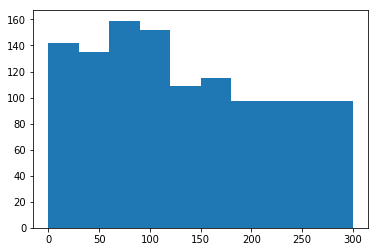

In [38]:
# import matplotlib.pylot to create some graphs.
import matplotlib.pyplot as plt
# display the histograph graph for exercise time.
plt.hist(df1.exercise_time);# add a column at the end to give some text to the 'exercise_time' score, set to 'int' with .astype.
df1['above_average'] = np.where(df1['exercise_time'] >= 135, '1',
                           np.where(df1['exercise_time'] <=134 , '0', '0')).astype(int)

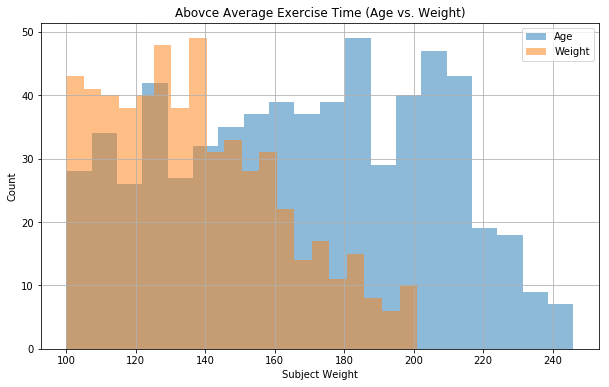

In [39]:
# trying to do a 'groupyby' but not sure if its the right type of data for it,
df1.groupby('above_average').weight.hist(bins=20, alpha=0.5, figsize=(10,6));
# give the graph a title.
plt.title('Abovce Average Exercise Time (Age vs. Weight)');
# label the y axis.
plt.ylabel('Count')
# label the x axis.
plt.xlabel('Subject Weight')
# label the legend.
plt.legend(['Age','Weight']);

In [40]:
# use pd.crosstab to see if there is any coorelation between age and above average exercise time.
pd.crosstab(df1['age'], df1['above_average'])

above_average,0,1
age,,
18,10,10
19,14,9
20,6,11
21,5,13
22,10,9
23,12,9
24,6,11
25,6,13
26,5,10


In [41]:
# use pd.crosstab to see if there is any coorelation between weight and above average exercise time.
pd.crosstab(df1['weight'], df1['above_average'])

above_average,0,1
weight,,
100,6,9
101,2,8
102,4,9
103,3,5
104,4,5
105,3,7
106,3,5
107,3,8
108,4,15


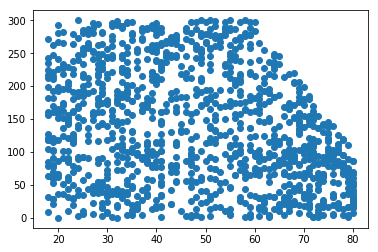

In [42]:
# scatter plot for age vs exercise time.
plt.scatter(df1['age'], df1['exercise_time']);

# we can see that as subjects age the exercise time decreases.

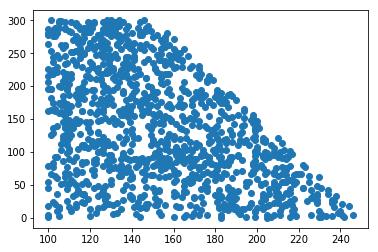

In [43]:
# scatter plot for weight vs exercise time.
plt.scatter(df1['weight'], df1['exercise_time']);

# we can see that as subjects become heavier the exercise time decreases.

In [0]:
# import seabon library to create more graphs.
import seaborn as sns

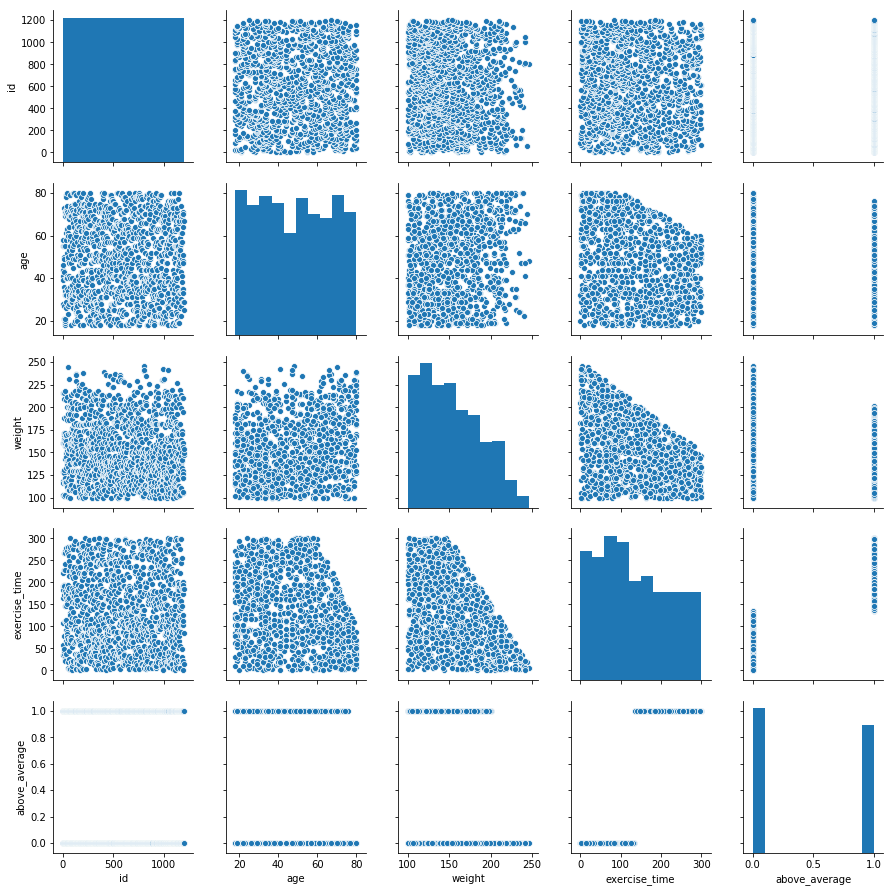

In [45]:
# show a pair plot graph for the whole data set.
sns.pairplot(df1);

## ## Looking at a different data set references police arrents in San Jose, CA.

In [46]:
# I chose this data set becuase I live close to San Jose, CA so I wanted to see the how the police arrests vs. subject race looked.

# import the .csv file in a data frame.
df = pd.read_csv('https://stacks.stanford.edu/file/druid:tr137st9964/tr137st9964_ca_san_jose_2019_02_25.csv.zip')
# show the data frame shape.
print(df.shape)
# display the header of the data set.
df.head()

(158935, 16)


,raw_row_number,date,time,location,lat,lng,subject_race,type,arrest_made,citation_issued,outcome,contraband_found,search_conducted,reason_for_stop,use_of_force_description,use_of_force_reason
0,1,2014-10-01,00:20:44,ESTHER DR AND HERRING AV,37.257473,-121.935799,white,vehicular,False,False,NaN,False,True,Vehicle Code Violation,"no curb, no handcuff, no police vehicle","no curb, no handcuff, no police vehicle"
1,2,2014-10-01,00:22:57,S KING RD AND TULLY RD,37.322302,-121.825863,white,vehicular,False,False,NaN,NaN,False,Vehicle Code Violation,"no curb, no handcuff, no police vehicle","no curb, no handcuff, no police vehicle"
2,3,2014-10-01,00:38:21,493 EL CAJON DR,37.282624,-121.824022,hispanic,vehicular,False,False,NaN,NaN,False,Vehicle Code Violation,"no curb, no handcuff, no police vehicle","no curb, no handcuff, no police vehicle"
3,4,2014-10-01,00:41:05,WILLOWBROOK DR AND MERIDIAN AV,37.263928,-121.902745,other/unknown,vehicular,False,False,NaN,NaN,False,Vehicle Code Violation,"no curb, no handcuff, no police vehicle","no curb, no handcuff, no police vehicle"
4,5,2014-10-01,00:47:56,E CAPITOL EX AND SEVEN TREES BL,37.283966,-121.834019,black,pedestrian,False,False,NaN,NaN,False,Consensual,"no curb, no handcuff, no police vehicle","no curb, no handcuff, no police vehicle"


In [47]:
# look where all the NaN values are.
df.isnull().sum()

raw_row_number                   0
date                             1
time                             0
location                     11925
lat                          17930
lng                          17930
subject_race                  6427
type                         19096
arrest_made                    424
citation_issued                424
outcome                      97757
contraband_found            115373
search_conducted             10282
reason_for_stop               9215
use_of_force_description     19331
use_of_force_reason          13401
dtype: int64

In [48]:
# I am going to drop the NaN's.
df1 = df.dropna()
# show the header of the data set withought the NaN's.
df1.head()

,raw_row_number,date,time,location,lat,lng,subject_race,type,arrest_made,citation_issued,outcome,contraband_found,search_conducted,reason_for_stop,use_of_force_description,use_of_force_reason
51,52,2014-10-01,17:43:15,ALUM ROCK AV AND LAUMER AV,37.370624,-121.824468,asian/pacific islander,pedestrian,True,False,arrest,False,True,Vehicle Code Violation,handcuffed,officer safety concerns
53,54,2014-10-01,18:40:37,THE ALAMEDA AND SUNOL ST,37.331692,-121.906618,white,pedestrian,True,False,arrest,False,True,Vehicle Code Violation,handcuffed,other
54,55,2014-10-01,18:40:37,THE ALAMEDA AND SUNOL ST,37.331692,-121.906618,white,pedestrian,True,False,arrest,True,True,Vehicle Code Violation,handcuffed,officer safety concerns
59,60,2014-10-01,19:20:59,2151 MONTEREY RD,37.305270,-121.863883,hispanic,vehicular,False,True,citation,False,True,Vehicle Code Violation,handcuffed,other
80,81,2014-10-01,22:48:14,BERNAL RD AND HEATON MOOR DR,37.220764,-121.782600,white,pedestrian,True,False,arrest,True,True,Consensual,handcuffed,safety concern during prior contact(s)


In [49]:
# lets see how the subject_race #s are split up.
df1['subject_race'].value_counts()

hispanic                  6632
white                     1532
black                     1159
asian/pacific islander     516
other/unknown              376
Name: subject_race, dtype: int64

In [50]:
# show the different 'outcomes'.
df1.outcome.value_counts().head(10)

citation    6994
arrest      3221
Name: outcome, dtype: int64

In [51]:
# show the different subject races.
df1.subject_race.value_counts(normalize='arrest').head(10)

hispanic                  0.649241
white                     0.149976
black                     0.113461
asian/pacific islander    0.050514
other/unknown             0.036809
Name: subject_race, dtype: float64

In [52]:
# what can we infer about the subjects race & the outcome 'citation'.
df1[df1.outcome == 'citation'].subject_race.value_counts(normalize=True).head(10)

hispanic                  0.680011
white                     0.129683
black                     0.109665
asian/pacific islander    0.046897
other/unknown             0.033743
Name: subject_race, dtype: float64

In [53]:
# what can we infer about the subjects race & the outcome 'arrest'.
df1[df1.outcome == 'arrest'].subject_race.value_counts(normalize=True).head(10)

hispanic                  0.582428
white                     0.194039
black                     0.121701
asian/pacific islander    0.058367
other/unknown             0.043465
Name: subject_race, dtype: float64

In [54]:
# what can we infer about the type vehicular or pedestrian & the outcome 'citation'.
df1[df1.outcome == 'citation'].type.value_counts(normalize=True).head(10)

vehicular     0.687017
pedestrian    0.312983
Name: type, dtype: float64

In [55]:
# what can we infer about the type vehicular or pedestrian & the outcome 'arrest'.
df1[df1.outcome == 'arrest'].type.value_counts(normalize=True).head(10)

pedestrian    0.68426
vehicular     0.31574
Name: type, dtype: float64

## Using %%timeit for Different Pandas Operations

In [0]:
from tqdm import tqdm
tqdm.pandas()

In [57]:
# using '%timeit' prior to a single code will give stats on on the speed of the code.
%timeit df1[df1.outcome == 'arrest'].type.value_counts(normalize=True).head(10)

100 loops, best of 3: 3.95 ms per loop


In [59]:
# using %%time above your code will give you the entire code blocks stats on on the speed of the code. 

%%time
# import the .csv file in a data frame.
df = pd.read_csv('https://stacks.stanford.edu/file/druid:tr137st9964/tr137st9964_ca_san_jose_2019_02_25.csv.zip')
# show the data frame shape.
print(df.shape)
# display the header of the data set.
df.head()

(158935, 16)
CPU times: user 715 ms, sys: 33.4 ms, total: 748 ms
Wall time: 5.27 s


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)